#  Projeto tipo INSIGHT - Metodologia CRISP-DS



# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [2]:
dados = pd.read_csv('kc_house_data.csv')
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.0 Questões de Negócio

## Questões de Negócio 01

In [3]:
df1 = dados.copy()




1. Qual o número de imóveis por ano de construção? 


2. Qual o menor número de quartos por ano de construção dos imóveis? 


3. Qual o preço de compra mais alto por cada número de quartos? 


4. Qual a soma de todos os preços de compra por cada número de quartos?


5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?


6. Qual o tamanho médio das salas dos imóveis por ano de construção? 


7. Qual o tamanho mediano das salas dos imóveis por ano de construção? 


8. Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção? 


9. Como é o crescimento médio preços de compra dos imóveis, por ano, por dia e semana do ano? 


10. Habilitar no mapa a identificação das casas com o maior preço.

## Questões de Negócio 02



1. Quantas casas estão disponíveis para compra?


2. Quantos atributos as casas possuem?


3. Quais são os atributos das casas?


4. Qual a casa mais cara ( casa com o maior valor de venda )?


5. Qual a casa com o maior número de quartos?


6. Qual a soma total de quartos do conjunto de dados?


7. Quantas casas possuem 2 banheiros?


8. Qual o preço médio de todas as casas no conjunto de dados?


9. Qual o preço médio de casas com 2 banheiros?


10. Qual o preço mínimo entre as casas com 3 quartos?


11. Quantas casas possuem mais de 300 metros quadrados na sala de estar?


12. Quantas casas tem mais de 2 andares?


13. Quantas casas tem vista para o mar?


14. Das casas com vista para o mar, quantas tem 3 quartos?


15. Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?


In [4]:
df2 = df1.copy()

In [5]:
#1 :casas disponíveis para a compra

houses = len(df2.value_counts('id'))
print('O número de casas disponíveis é {}'.format (houses))

O número de casas disponíveis é 21436


In [6]:
#2. Quantos atributos as casas possuem ?
# Assumptions:  as colunas 'id' e date não são atributos das casas
atributos = len(df2.drop(['id','date'], axis = 1).columns)
atributos
print('As casas tem {} atributos'. format(atributos))

As casas tem 19 atributos


In [7]:
#3: quais são os atributos das casas ?

df2.drop(['id','date'], axis = 1).columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
#4: Qual a casa mais cara ?

# comando loc não pega a posição da linha e sim o nome da linha
# por isso precisamos usar o reset.index
df2[['id', 'price']].sort_values('price', ascending = False)

,id,price
7252,6762700020,7700000.0
3914,9808700762,7062500.0
9254,9208900037,6885000.0
4411,2470100110,5570000.0
1448,8907500070,5350000.0
...,...,...
8274,3883800011,82000.0
16198,3028200080,81000.0
465,8658300340,80000.0
15293,40000362,78000.0


In [9]:
#indice pego foi o da tabela sem o sort values
df2[['id', 'price']].loc[0,'id']

7129300520

In [10]:
#com o índice resetado
df2[['id', 'price']].sort_values('price', ascending = False).reset_index().loc[0,'id']

6762700020

In [11]:
#5: Qual a casa com o maior número de quartos ?

#casa com maior numero de quartos
df2.sort_values('bedrooms', ascending = False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [12]:
print( 'A casa de id',df2[['id', 'bedrooms']].sort_values('bedrooms', ascending = False).reset_index().loc[0,'id'])

A casa de id 2402100895


In [13]:
#6: soma total de quartos do conjunto de dados
sum(df2['bedrooms'])

72854

In [14]:
#7: quantidade de casas com 2 banheiros
casas_2_quartos = df2.query('bathrooms == 2')
len(casas_2_quartos)

1930

In [15]:
#8: preço medio de todas as casas
dados.describe().loc['mean', 'price']

540088.1417665294

In [16]:
#9: preço medio casas com 2 banheiros
casas_2_quartos['price'].mean()

457889.7186528497

In [17]:
casas_3_quartos = df2.query('bedrooms == 3')
casas_3_quartos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509


In [18]:
#10: casa com preço minimo de  3 quartos
casas_3_quartos['price'].sort_values(ascending=True).reset_index().loc[0]

index     8274.0
price    82000.0
Name: 0, dtype: float64

In [19]:
#11: Quantas casas possuem + 300m² na sala de estar
#preciso fazer a conversão de sqft(squarefoot) para m²
df2['m2'] = df2['sqft_living'] * 0.093
df2['m2']

len(df2.query('m2 > 300'))

2258

In [20]:
#12: quantas casas tem mais de 2 andares
len(df2.query('floors > 2'))

782

In [21]:
#13: Quantas casas tem vista para o mar
casas_vistas_mar = df2.query('waterfront > 0')
len(casas_vistas_mar)

163

In [22]:
#14: Das casas com vista para o mar, quantas tem 3 quartos
len(casas_vistas_mar.query('bedrooms == 3'))

64

In [23]:
#15 das casas com + de 300m², quantas tem mais de 2 banheiros ?
casas_300 = df2.query('m2 > 300')
casas_300

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,504.060
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,331.080
41,7766200013,20140811T000000,775000.0,4,2.25,4220,24186,1.0,0,0,...,2600,1620,1984,0,98166,47.4450,-122.347,2410,30617,392.460
42,7203220400,20140707T000000,861990.0,5,2.75,3595,5639,2.0,0,0,...,3595,0,2014,0,98053,47.6848,-122.016,3625,5639,334.335
58,7922800400,20140827T000000,951000.0,5,3.25,3250,14342,2.0,0,4,...,3250,0,1968,0,98008,47.5880,-122.116,2960,11044,302.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,20140813T000000,679950.0,5,2.75,3600,9437,2.0,0,0,...,3600,0,2014,0,98059,47.4822,-122.131,3550,9421,334.800
21597,191100405,20150421T000000,1575000.0,4,3.25,3410,10125,2.0,0,0,...,3410,0,2007,0,98040,47.5653,-122.223,2290,10125,317.130
21599,7202300110,20140915T000000,810000.0,4,3.00,3990,7838,2.0,0,0,...,3990,0,2003,0,98053,47.6857,-122.046,3370,6814,371.070
21600,249000205,20141015T000000,1537000.0,5,3.75,4470,8088,2.0,0,0,...,4470,0,2008,0,98004,47.6321,-122.200,2780,8964,415.710


In [24]:
len(casas_300.query('bathrooms > 2'))

2201

## Questões de Negócio 03



1. Crie uma nova coluna chamada: “house_age”
- Se o valor da coluna “date” for maior que 2014-01-01 => ‘new_house’
- Se o valor da coluna “date” for menor que 2014-01-01 => ‘old_house’

2. Crie uma nova coluna chamada: “dormitory_type”
- Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

3. Crie uma nova coluna chamada: “condition_type” - Se o valor da coluna “condition” for menor ou igual à 2 => ‘bad’
- Se o valor da coluna “condition” for igual à 3 ou 4 => ‘regular’
- Se o valor da coluna “condition” for igual à 5 => ‘good’

4. Modifique o TIPO a Coluna “condition” para STRING


5. Delete as colunas: “sqft_living15” e “sqft_lot15”


6. Modifique o TIPO a Coluna “yr_build” para DATE


7. Modifique o TIPO a Coluna “yr_renovated” para DATE


8. Qual a data mais antiga de construção de um imóvel?


9. Qual a data mais antiga de renovação de um imóvel?


10. Quantos imóveis tem 2 andares?


11. Quantos imóveis estão com a condição igual a “regular” ?


12. Quantos imóveis estão com a condição igual a “bad”e possuem “vista para água” ?


13. Quantos imóveis estão com a condição igual a “good” e são “new_house”?


14. Qual o valor do imóvel mais caro do tipo “studio” ?


15. Quantos imóveis do tipo “apartment” foram reformados em 2015 ?


16. Qual o maior número de quartos que um imóveis do tipo “house” possui ?


17. Quantos imóveis “new_house” foram reformados no ano de 2014?


18. Selecione as colunas: “id”, “date”, “price”, “floors”,“zipcode” pelo método:
10.1. Direto pelo nome das colunas.
10.2. Pelos Índices.
10.3. Pelos Índices das linhas e o nome das colunas
10.4. Índices Booleanos

19. Salve um arquivo .csv com somente as colunas do item 10 ao 17.


20. Modifique a cor dos pontos no mapa de “pink” para “verde-escuro”

In [25]:
df3 = df2.copy()

In [26]:
#1: Crie uma nova coluna chamada: “house_age”
df3['house_age'] = 'house_age'
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,109.74,house_age
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,239.01,house_age
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,71.61,house_age
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,182.28,house_age
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,156.24,house_age


In [27]:
data = pd.to_datetime('2014-01-01')
data

Timestamp('2014-01-01 00:00:00')

In [28]:
df3['date'] = pd.to_datetime(df3['date'])
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,109.74,house_age
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,239.01,house_age
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,71.61,house_age
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,182.28,house_age
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,156.24,house_age


In [29]:
df3.loc[df3['date'] > data, 'house_age'] = 'new_house'
df3.loc[df3['date'] < data, 'house_age'] = 'old_house'
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,109.74,new_house
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,239.01,new_house
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,71.61,new_house
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,182.28,new_house
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,156.24,new_house


In [30]:
#2: Crie uma nova coluna chamada: “dormitory_type”
df3['dormitory_type'] = 'dormitório'
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2,house_age,dormitory_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,109.74,new_house,dormitório
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,239.01,new_house,dormitório
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,71.61,new_house,dormitório
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,182.28,new_house,dormitório
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,156.24,new_house,dormitório


In [84]:
df3['dormitory_type'] = 'NA'
for i in range( len( df3 ) ):
    if df3.loc[i, 'bedrooms'] == 1:
        df3.loc[i, 'dormitory_type'] = 'studio'
    elif df3.loc[i, 'bedrooms'] == 2:
        df3.loc[i, 'dormitory_type'] = 'apartment'
    elif df3.loc[i, 'bedrooms'] > 2:
        df3.loc[i, 'dormitory_type'] = 'house'


In [85]:
#3: Crie uma nova coluna chamada: “condition_type” - Se o valor da coluna “condition” for menor ou igual à 2 => ‘bad’
#Se o valor da coluna “condition” for igual à 3 ou 4 => ‘regular’
#Se o valor da coluna “condition” for igual à 5 => ‘good’
df3['condition_type'] = 'condition'
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955-01-01,1970-01-01,98178,47.5112,-122.257,109.74,new_house,house,condition
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951-01-01,1991-01-01,98125,47.7210,-122.319,239.01,new_house,house,condition
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933-01-01,1970-01-01,98028,47.7379,-122.233,71.61,new_house,apartment,condition
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965-01-01,1970-01-01,98136,47.5208,-122.393,182.28,new_house,house,condition
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987-01-01,1970-01-01,98074,47.6168,-122.045,156.24,new_house,house,condition


In [88]:
df3['condition'] = df3['condition'].astype( int )
df3['conditional_type'] = df3['condition'].apply( lambda x: 'bad' if x <= 2
                                                else 'regular' if (x == 3) | (x == 4) else 'good' )

In [89]:
#4 Modifique o TIPO a Coluna “condition” para STRING
df3['condition'] = df3['condition'].astype('string')
df3.dtypes

id                           int64
date                datetime64[ns]
price                      float64
bedrooms                     int64
bathrooms                  float64
sqft_living                  int64
sqft_lot                     int64
floors                     float64
waterfront                   int64
view                         int64
condition                   string
grade                        int64
sqft_above                   int64
sqft_basement                int64
yr_built            datetime64[ns]
yr_renovated        datetime64[ns]
zipcode                      int64
lat                        float64
long                       float64
m2                         float64
house_age                   object
dormitory_type              object
condition_type              object
conditional_type            object
dtype: object

In [90]:
#5 Delete as colunas: “sqft_living15” e “sqft_lot15”
df3 = df3.drop(['sqft_living15', 'sqft_lot15'], axis = 1) 
df3.head()

KeyError: "['sqft_living15', 'sqft_lot15'] not found in axis"

In [91]:
#6 Modifique o TIPO a Coluna “yr_build” para DATE
df3['yr_built'] = pd.to_datetime(df3['yr_built'], format = '%Y')
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type,conditional_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955-01-01,1970-01-01,98178,47.5112,-122.257,109.74,new_house,house,condition,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951-01-01,1991-01-01,98125,47.7210,-122.319,239.01,new_house,house,condition,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933-01-01,1970-01-01,98028,47.7379,-122.233,71.61,new_house,apartment,condition,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965-01-01,1970-01-01,98136,47.5208,-122.393,182.28,new_house,house,condition,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987-01-01,1970-01-01,98074,47.6168,-122.045,156.24,new_house,house,condition,regular


In [92]:
#Uso o lambda pois tenho muitos valores '0' nessa coluna
#7 Modifique o TIPO a Coluna “yr_renovated” para DATE
df3['yr_renovated'] = df3['yr_renovated'].apply( lambda x: pd.to_datetime('1970-01-01', format ='%Y-%m-%d' )
                                                         if x == 0 else pd.to_datetime(x, format = '%Y') )
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type,conditional_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955-01-01,1970-01-01,98178,47.5112,-122.257,109.74,new_house,house,condition,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951-01-01,1991-01-01,98125,47.7210,-122.319,239.01,new_house,house,condition,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933-01-01,1970-01-01,98028,47.7379,-122.233,71.61,new_house,apartment,condition,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965-01-01,1970-01-01,98136,47.5208,-122.393,182.28,new_house,house,condition,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987-01-01,1970-01-01,98074,47.6168,-122.045,156.24,new_house,house,condition,regular


In [93]:
#8 Qual a data mais antiga de construção de um imóvel?
df3['yr_built'].sort_values(ascending = True).reset_index().iloc[0]
df3['yr_built'].min()

Timestamp('1900-01-01 00:00:00')

In [94]:
#9 Qual a data mais antiga de renovação de um imóvel?
df3['yr_renovated'].min() 

Timestamp('1934-01-01 00:00:00')

In [95]:
#10 Quantos imóveis tem 2 andares?
len(df3.query('floors == 2'))

8241

In [96]:
#11 Quantos imóveis estão com a condição igual a “regular” ? 
len(df3.query('condition_type == "regular"'))

0

In [97]:
#12 Quantos imóveis estão com a condição igual a “bad”e possuem “vista para água” ?
bad = df3.query('condition_type == "bad"')
bad.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type,conditional_type


In [98]:
len(bad.query('waterfront == 1'))

0

In [99]:
#13 Quantos imóveis estão com a condição igual a “good” e são “new_house”?
good = df3.query('condition_type == "good"')
good.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type,conditional_type


In [100]:
len(good.query('house_age == "new_house"'))

0

In [101]:
#14 Qual o valor do imóvel mais caro do tipo “studio” ?
df3.query('dormitory_type == "studio" ').sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type,conditional_type
8445,724069023,2015-04-14,1247000.0,1,1.25,1810,5070,1.5,1,4,...,1967-01-01,1970-01-01,98075,47.5814,-122.081,168.33,new_house,studio,condition,regular
9888,1231000310,2014-08-12,713000.0,1,1.00,1180,4000,1.5,0,2,...,1910-01-01,1970-01-01,98118,47.5561,-122.266,109.74,new_house,studio,condition,regular
4410,4083304190,2014-08-04,680000.0,1,2.50,1820,3008,2.0,0,0,...,1910-01-01,2004-01-01,98103,47.6529,-122.339,169.26,new_house,studio,condition,regular
8165,1797500530,2015-05-05,655100.0,1,1.00,1220,4160,1.0,0,0,...,1922-01-01,1970-01-01,98115,47.6746,-122.315,113.46,new_house,studio,condition,regular
19273,9164100035,2015-04-29,655000.0,1,1.00,1660,5422,1.0,0,0,...,1908-01-01,1970-01-01,98117,47.6821,-122.388,154.38,new_house,studio,condition,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16530,2114700500,2015-04-18,90000.0,1,1.00,560,4120,1.0,0,0,...,1947-01-01,1970-01-01,98106,47.5335,-122.348,52.08,new_house,studio,condition,regular
7992,2734100835,2015-03-03,90000.0,1,1.00,780,4000,1.0,0,0,...,1905-01-01,1970-01-01,98108,47.5424,-122.321,72.54,new_house,studio,condition,regular
3108,1721801591,2015-02-19,89950.0,1,1.00,570,4080,1.0,0,0,...,1942-01-01,1970-01-01,98146,47.5098,-122.334,53.01,new_house,studio,condition,regular
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,1912-01-01,1970-01-01,98014,47.6499,-121.909,39.99,new_house,studio,condition,bad


In [102]:
#15 Quantos imóveis do tipo “apartment” foram reformados em 2015 ?
df3['yr_renovated'].value_counts()

1970-01-01    20708
2014-01-01       91
2013-01-01       37
2003-01-01       36
2005-01-01       35
              ...  
1951-01-01        1
1959-01-01        1
1948-01-01        1
1934-01-01        1
1944-01-01        1
Name: yr_renovated, Length: 69, dtype: int64

In [103]:
#16 Qual o maior número de quartos que um imóveis do tipo “house” possui ?
df3.query('dormitory_type == "house" ').sort_values('bedrooms', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type,conditional_type
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1947-01-01,1970-01-01,98103,47.6878,-122.331,150.66,new_house,house,condition,good
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,1918-01-01,1999-01-01,98106,47.5560,-122.363,279.00,new_house,house,condition,regular
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,2008-01-01,1970-01-01,98004,47.5861,-122.113,426.87,new_house,house,condition,regular
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,1913-01-01,1970-01-01,98105,47.6635,-122.320,271.56,new_house,house,condition,regular
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,1958-01-01,1970-01-01,98006,47.5705,-122.175,335.73,new_house,house,condition,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9398,9287800375,2014-10-30,685000.0,3,2.00,2210,5000,1.5,0,2,...,1909-01-01,1970-01-01,98103,47.6754,-122.357,205.53,new_house,house,condition,regular
9400,2407000145,2015-01-20,197200.0,3,1.00,1140,8775,1.0,0,0,...,1942-01-01,1970-01-01,98146,47.4824,-122.336,106.02,new_house,house,condition,regular
9401,452001280,2014-07-03,529950.0,3,1.00,1240,5000,1.5,0,0,...,1909-01-01,1970-01-01,98107,47.6755,-122.367,115.32,new_house,house,condition,good
9403,4232901120,2014-05-20,792000.0,3,1.50,1570,1050,2.0,0,0,...,1915-01-01,1970-01-01,98109,47.6358,-122.356,146.01,new_house,house,condition,regular


In [104]:
#17 Quantos imóveis “new_house” foram reformados no ano de 2014?
new_house = df3.query('house_age == "new_house" ')
new_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,m2,house_age,dormitory_type,condition_type,conditional_type
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955-01-01,1970-01-01,98178,47.5112,-122.257,109.74,new_house,house,condition,regular
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951-01-01,1991-01-01,98125,47.7210,-122.319,239.01,new_house,house,condition,regular
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933-01-01,1970-01-01,98028,47.7379,-122.233,71.61,new_house,apartment,condition,regular
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965-01-01,1970-01-01,98136,47.5208,-122.393,182.28,new_house,house,condition,good
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987-01-01,1970-01-01,98074,47.6168,-122.045,156.24,new_house,house,condition,regular


In [105]:
len(new_house.query('yr_renovated == 2014'))

91

In [106]:
#18 Selecione as colunas: “id”, “date”, “price”, “floors”, “zipcode” pelo método:
#Direto pelo nome das colunas.
#Pelos Índices.
#Pelos Índices das linhas e o nome das colunas
#Índices Booleanos

In [107]:
#direto pelo nome das colunas
df3[['id','date', 'price', 'floors', 'zipcode']].head()

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074


In [108]:
#Pelos Índices
df3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'm2', 'house_age', 'dormitory_type', 'condition_type',
       'conditional_type'],
      dtype='object')

In [109]:
df3.iloc[:,[0,1,2, 7, 16]]

,id,date,price,floors,zipcode
0,7129300520,2014-10-13,221900.0,1.0,98178
1,6414100192,2014-12-09,538000.0,2.0,98125
2,5631500400,2015-02-25,180000.0,1.0,98028
3,2487200875,2014-12-09,604000.0,1.0,98136
4,1954400510,2015-02-18,510000.0,1.0,98074
...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,98103
21609,6600060120,2015-02-23,400000.0,2.0,98146
21610,1523300141,2014-06-23,402101.0,2.0,98144
21611,291310100,2015-01-16,400000.0,2.0,98027


In [110]:
#20 Salve um arquivo .csv com somente as colunas do item 10 ao 17.
df3.iloc[:,[0,1,2, 7, 16]].to_csv('exercicio_19')

## Questões de Negócio 04


2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.


3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.


4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.


5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.


6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.


7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas)


8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )


9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )


10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [111]:
df4 = dados.copy()

In [112]:
df4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


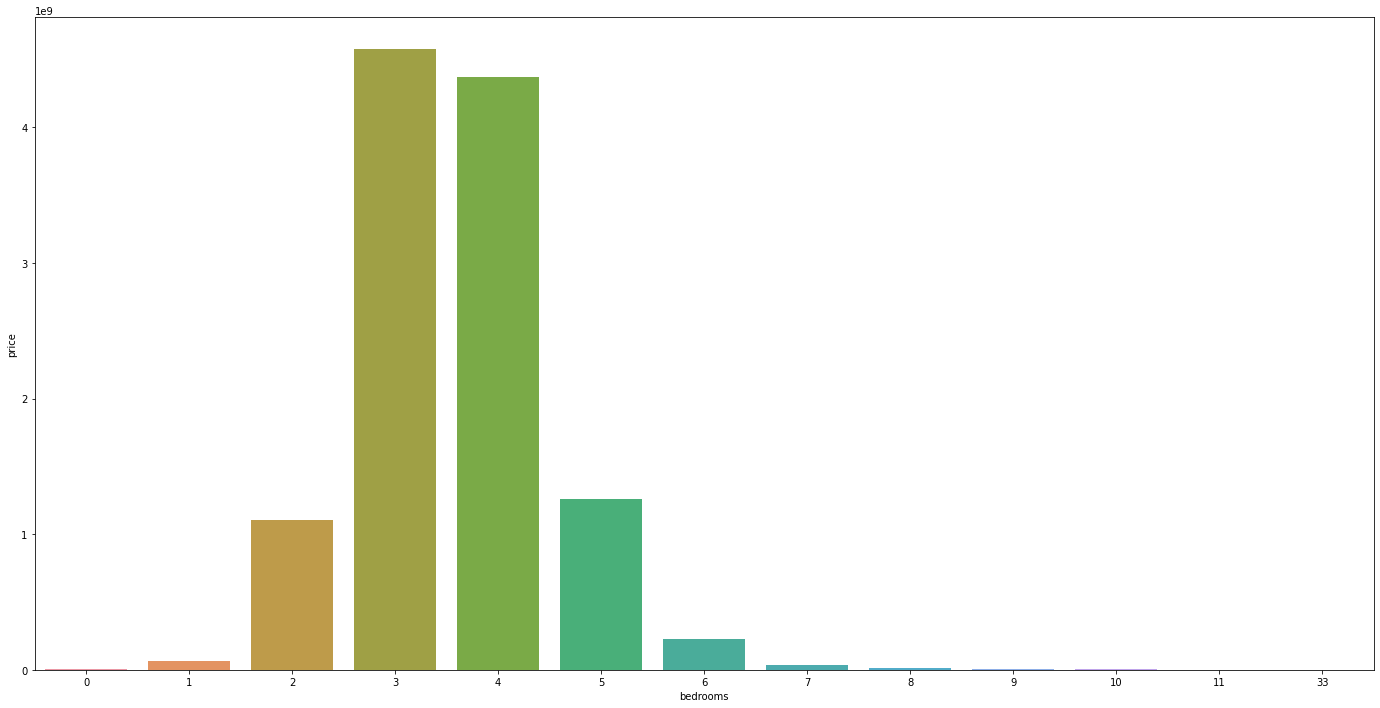

In [113]:
#1. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

plt.figure( figsize=(24,12))
df41 = df4[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df41 );

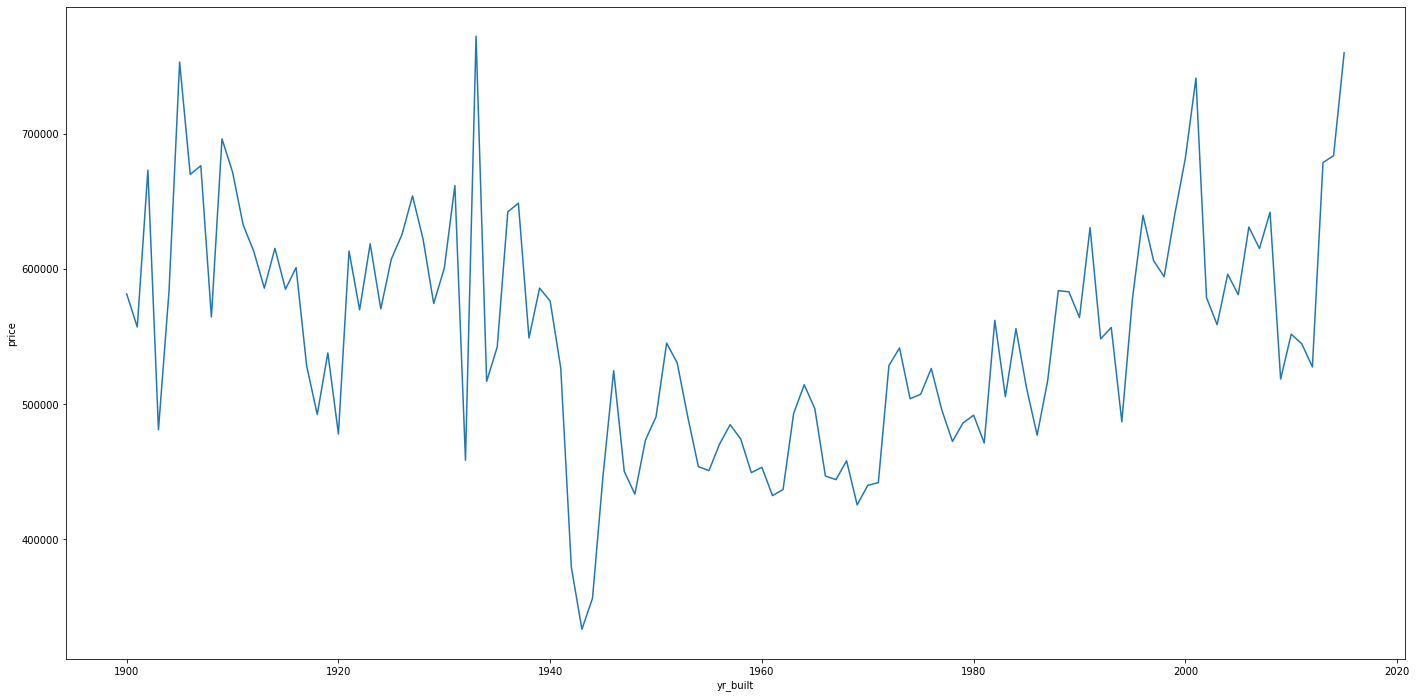

In [114]:
#2: Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

plt.figure( figsize=(24,12))
df42 = df4[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=df42 );

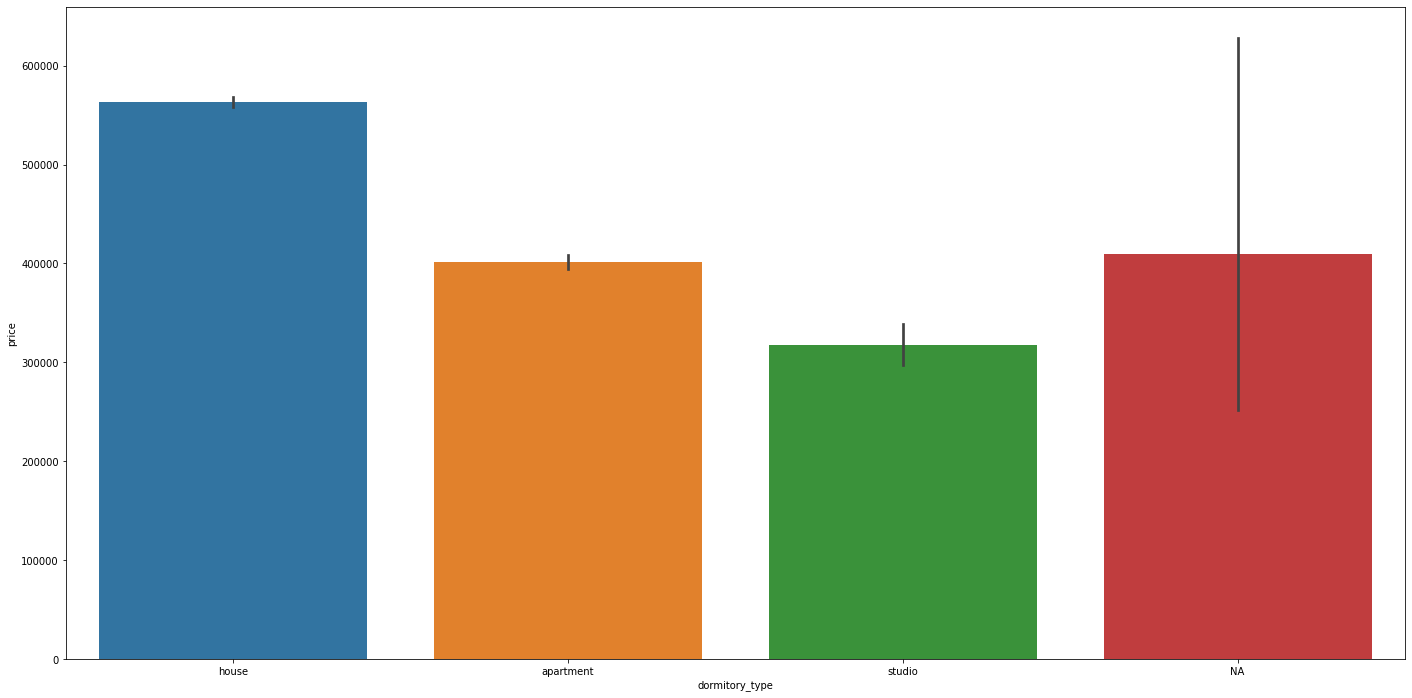

In [116]:
#3: Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

plt.figure( figsize=(24,12) )
df43 = df3[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean()
sns.barplot( x='dormitory_type', y='price', data=df3 );

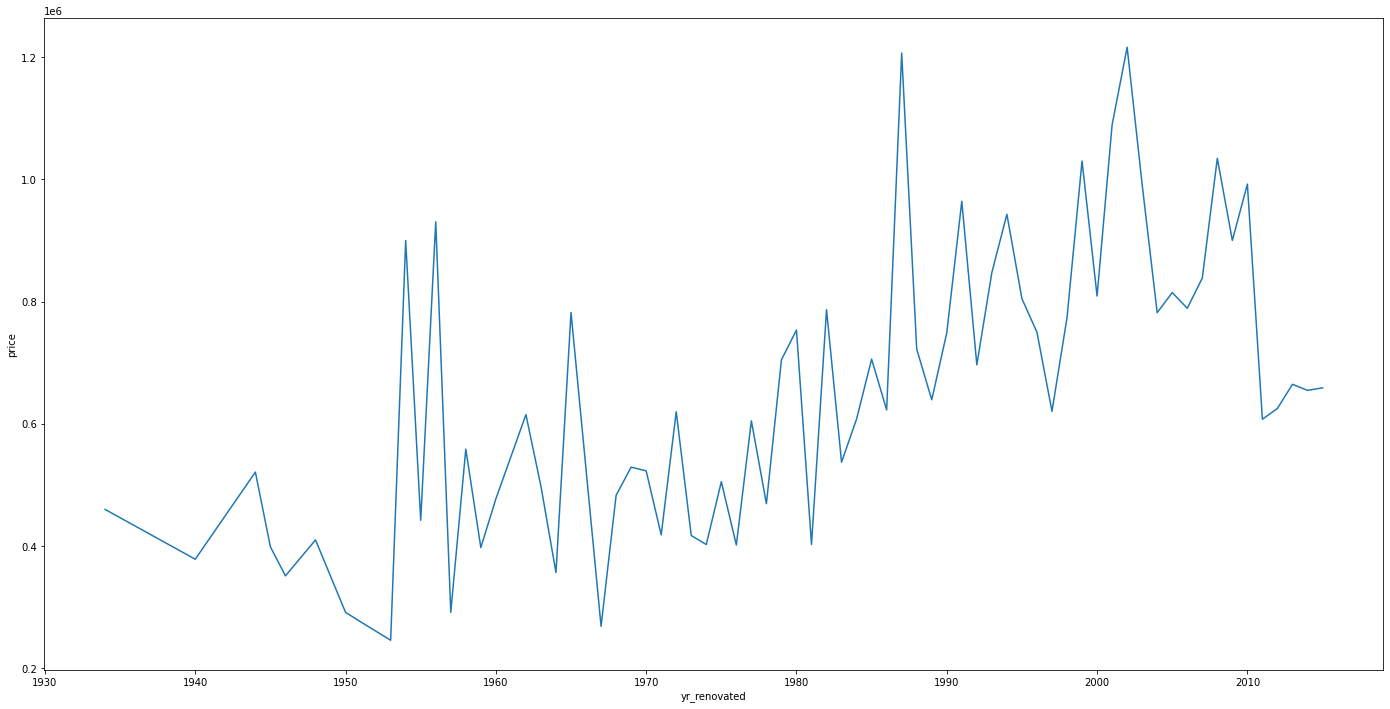

In [119]:
#5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.
plt.figure( figsize=(24,12))
df44 = df4.loc[df4['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated' ).mean().reset_index()
sns.lineplot( x='yr_renovated', y='price', data=df44 );

# 2. Entedimento do Negócio

# 3. Coleta de Dados

# 4. Limpeza de Dados

# 5. Exploração dos Dados